In [6]:
import os
from pathlib import Path

# set current directory to TABME
if Path(os.getcwd()).stem!="TABME":
    os.chdir('..')

In [7]:
import pandas as pd
from IPython.display import display
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [8]:
df = pd.read_csv('notebooks/full_model_performance.csv')
df_page = pd.read_csv('predictions/full_model_predictions_test.csv')
path_img_folder = 'data/test'

# **Correct predictions**

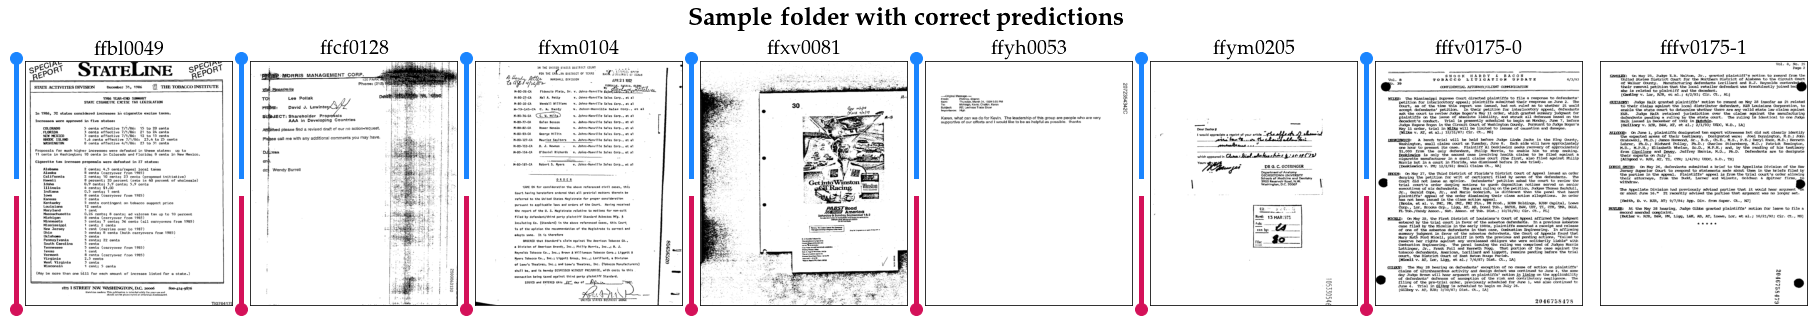

In [9]:
folder_id = 560
n=8

df_folder = df_page[df_page.folder_id==folder_id] 
num_pages = len(df_folder)

predictions = df_folder['prediction'].to_list()
labels = df_folder['label'].to_list()

plt.figure(figsize=(25,4))
ax0 = plt.axes([0, 0, 1, 1])
ax0.set_xlim([0,1])
ax0.set_ylim([-0.1,1.2])

ax0.set_xticks([])
ax0.set_yticks([])
ax0.axis('off')
ax0.set_title(r"\textbf{Sample folder with correct predictions}", fontdict={'fontsize': 25})

for i, row in enumerate(df_folder.iterrows()):
    # idx = starting_index+i
    row = row[1]
    stem = row['stem']
    page_num = row['page_num']
    path_img = next(iter(Path(path_img_folder).glob(f"**/{stem}.jpg"))) # find the matching first element 
    
    if predictions[i]:
        ax0.plot([0.125*i+0.005, 0.125*i+0.005], [0.55, 1.08], color='#1A85FF', lw=5)
        ax0.plot(0.125*i+0.005, 1.08, marker='o', color='#1A85FF',markersize=12)

    if labels[i]:
        ax0.plot([0.125*i+0.005, 0.125*i+0.005], [-0.05, 0.45], color='#D41159', lw=5)
        ax0.plot(0.125*i+0.005, -0.05, marker='o', color='#D41159',markersize=12)

    # ax = plt.subplot(num_pages//n+1,n,i+1)
    ax = plt.axes([0.125*i+0.01, 0.05, 0.115, 0.85])
    ax.imshow(Image.open(path_img), cmap='gray', aspect='auto')

    ax.set_title(f'{stem}', fontdict={'fontsize': 20})

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig("notebooks/figs/sample_preds_correct.pdf", bbox_inches='tight', pad_inches=0)

plt.show()


# **Incorrect predictions**

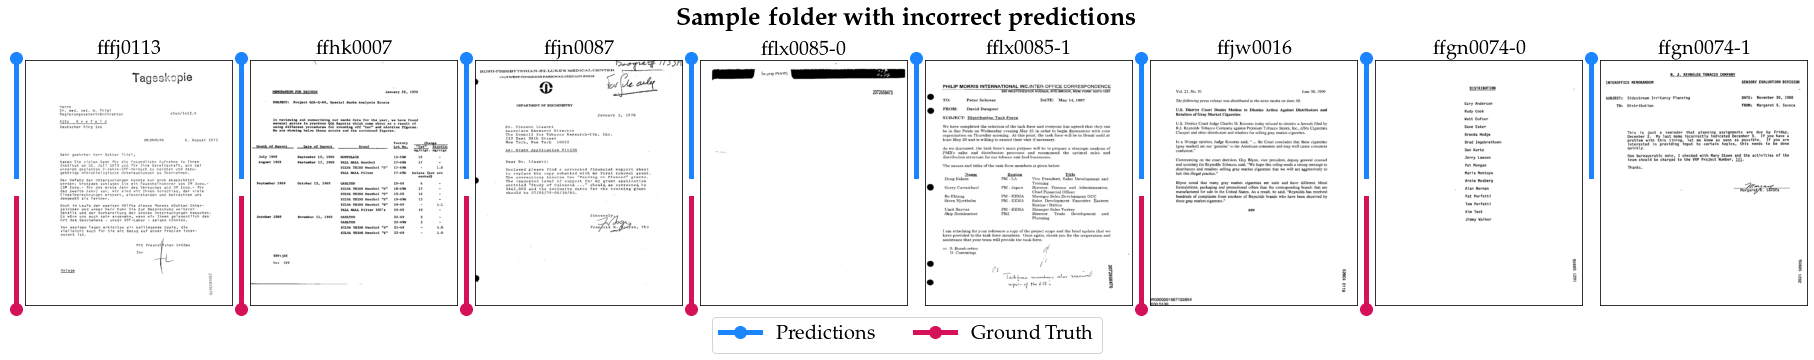

In [10]:
# folder_id =  332
folder_id =  1471
n=8

df_folder = df_page[df_page.folder_id==folder_id].iloc[:8]
num_pages = len(df_folder)

predictions = df_folder['prediction'].to_list()
labels = df_folder['label'].to_list()

plt.figure(figsize=(25,4))
ax0 = plt.axes([0, 0, 1, 1])
ax0.set_xlim([0,1])
ax0.set_ylim([-0.1,1.2])

ax0.set_xticks([])
ax0.set_yticks([])
ax0.axis('off')
ax0.set_title(r"\textbf{Sample folder with incorrect predictions}", fontdict={'fontsize': 25})

for i, row in enumerate(df_folder.iterrows()):
    # idx = starting_index+i
    row = row[1]
    stem = row['stem']
    page_num = row['page_num']
    path_img = next(iter(Path(path_img_folder).glob(f"**/{stem}.jpg"))) # find the matching first element 
    
    if predictions[i]:
        ax0.plot([0.125*i+0.005, 0.125*i+0.005], [0.55, 1.08], color='#1A85FF', lw=5)
        ax0.plot(0.125*i+0.005, 1.08, marker='o', color='#1A85FF',markersize=12)

    if labels[i]:
        ax0.plot([0.125*i+0.005, 0.125*i+0.005], [-0.05, 0.45], color='#D41159', lw=5)
        ax0.plot(0.125*i+0.005, -0.05, marker='o', color='#D41159',markersize=12)

    # ax = plt.subplot(num_pages//n+1,n,i+1)
    ax = plt.axes([0.125*i+0.01, 0.05, 0.115, 0.85])
    ax.imshow(Image.open(path_img), cmap='gray', aspect='auto')

    ax.set_title(f'{stem}', fontdict={'fontsize': 20})

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

line1 = Line2D([0], [0], marker='o', color='#1A85FF', lw=5, markersize=12)
line2 = Line2D([0], [0], marker='o', color='#D41159', lw=5, markersize=12)

ax0.legend([line1, line2], ['Predictions', 'Ground Truth'], loc ='lower center', bbox_to_anchor=(0.5,-0.15), prop={'size': 20}, ncol=2)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig("notebooks/figs/sample_preds_incorrect.pdf", bbox_inches='tight', pad_inches=0)
plt.show()
